In [1]:
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.config(log_console=True)
ox.__version__

'1.1.0'

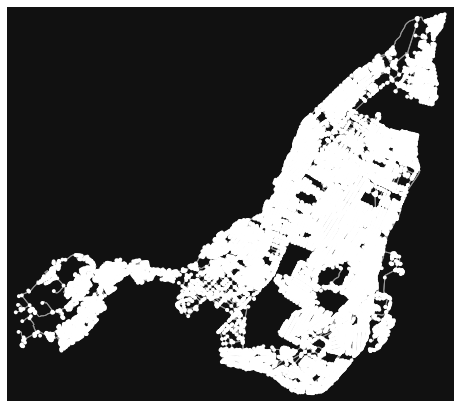

In [2]:
# download/model Montreal street network then visualize it
G = ox.graph_from_place("Montréal, QC, Canada", network_type="drive")
fig, ax = ox.plot_graph(G)

In [1]:
# define a bounding box Centre-ville, Montréal, QC, Canada
north, east = 45.512984, -73.553328
south, west = 45.496527, -73.581779

# create network from that bounding box
subG = ox.graph_from_bbox(north, south, east, west, network_type="drive")
fig, ax = ox.plot_graph(subG)

NameError: name 'ox' is not defined

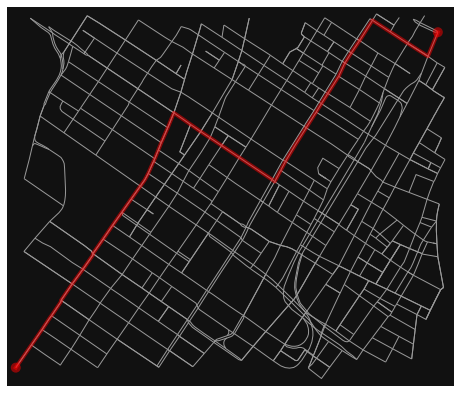

In [4]:
# impute missing edge speeds and calculate edge travel times with the speed module
subG = ox.speed.add_edge_speeds(subG)
subG = ox.speed.add_edge_travel_times(subG)

# get the nearest network nodes to two lat/lng points with the distance module
orig = ox.distance.nearest_nodes(subG, X=west, Y=south)
dest = ox.distance.nearest_nodes(subG, X=east, Y=north)

# find the shortest path between nodes, minimizing travel time, then plot it
route = ox.shortest_path(subG, orig, dest, weight="travel_time")
fig, ax = ox.plot_graph_route(subG, route, node_size=0)

In [7]:
ox.stats.basic_stats(subG)

{'n': 460,
 'm': 952,
 'k_avg': 4.139130434782609,
 'edge_length_total': 88337.75800000016,
 'edge_length_avg': 92.79176260504218,
 'streets_per_node_avg': 3.515217391304348,
 'streets_per_node_counts': {0: 0, 1: 5, 2: 5, 3: 213, 4: 225, 5: 9, 6: 3},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.010869565217391304,
  2: 0.010869565217391304,
  3: 0.46304347826086956,
  4: 0.4891304347826087,
  5: 0.01956521739130435,
  6: 0.006521739130434782},
 'intersection_count': 455,
 'street_length_total': 73360.53500000006,
 'street_segment_count': 767,
 'street_length_avg': 95.64606910039122,
 'circuity_avg': 1.0127276926212068,
 'self_loop_proportion': 0.0}

In [9]:
type(subG)

networkx.classes.multidigraph.MultiDiGraph